## IFT6135 Assignment4, Programming part

Names: Xiao Fan (20086722) ,  Zhibin Lu (20091078)

In [169]:
import time
import os
import importlib

# path = 'C:/Users/lingyu.yue/Documents/Xiao_Fan/GAN'
path="/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4/"
if os.path.isdir(path):
    os.chdir(path)
else:
    os.chdir("./")
print(os.getcwd())

import matplotlib.pyplot as plt
from scipy.misc import imresize
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from torchvision.utils import save_image
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from PIL import Image
import itertools
from inception_score import inception_score
from inception_score import inception_score2
import GAN_CelebA
#from GAN_train import loadCheckpoint,generator,generator_Upsampling,discriminator,show_result
importlib.reload(GAN_CelebA)


/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4
/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4


<module 'GAN_CelebA' from '/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4/GAN_CelebA.py'>

In [170]:
img_root = "img_align_celeba/resized_celebA/"
IMAGE_RESIZE = 64
batch_size = 128
use_cuda = torch.cuda.is_available()

data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
dataset = datasets.ImageFolder(root=img_root, transform=data_transform)


## DCGAN (question1-3)
### Deconvolution Generator

==> Resuming from checkpoint..


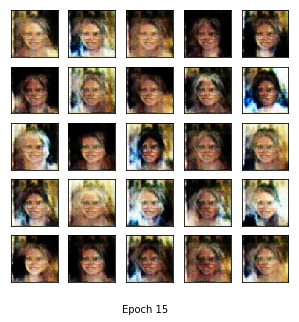

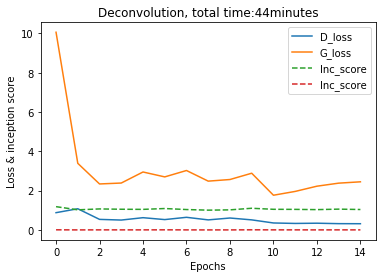

In [171]:
filename='GANDeconv_t10000_h100_train2_ep15' #'GANDeconvolution_t2000_h100_ep20.c5'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/result_Deconvolution.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss & inception score')
plt.title('Deconvolution, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.show()

#test_z = torch.randn(10000,100,1,1)
#inception_score(test_z, G, D, batch_size=128, cuda=use_cuda, resize=False, splits=10)


In [295]:
# filename='GANDeconvolution_t4000_h100_ep40.c1'
# hidden_dim = 100
# G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
# epoch_num=len(train_hist['D_losses'])
# GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/result_Deconvolution.pdf', use_cuda=use_cuda)

# plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
# plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
# plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
# plt.xlabel('Epochs')
# plt.ylabel('Loss & inception score')
# plt.title('Deconvolution, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
# plt.legend()
# plt.show()

Deconvolution,x=4000,h=100,epoch=40,critic=1

[5/40], loss_D: 1.140, loss_G: 2.194 - critic: 1, ptime: 60.35s
Inception score:  (1.0287746, 0.00093545974)
[6/40], loss_D: 1.173, loss_G: 2.073 - critic: 1, ptime: 60.24s
Inception score:  (1.0718858, 0.002663061)
[7/40], loss_D: 1.324, loss_G: 2.147 - critic: 1, ptime: 60.23s
...
[38/40], loss_D: 0.555, loss_G: 1.964 - critic: 1, ptime: 60.30s
Inception score:  (1.0298634, 0.0012569557)
[39/40], loss_D: 0.670, loss_G: 1.711 - critic: 1, ptime: 60.21s
Inception score:  (1.0573535, 0.0026179806)
[40/40], loss_D: 0.999, loss_G: 1.336 - critic: 1, ptime: 60.24s
Inception score:  (1.0479665, 0.0020475413)
Avg per epoch ptime: 60.25s, total 40 epochs ptime: 3588.62s

We adjust the value of the Critic dynamically during the training. For each minibatch, when fixing the generator and training the discriminator, we want the discriminator's loss, $mean(real\_data\_loss+fake\_data\_loss)<0.69$, which is $E[p]>0.5$ ; similarly when fixing the discriminator, we want the generator to generate The probability of the picture being judged by discriminator, E[p]>0.5. This can make discriminator and generator work together as much as possible. Experiments have found that the effect is good.


==> Resuming from checkpoint..


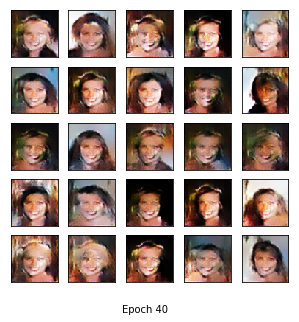

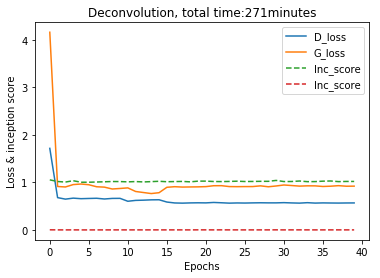

In [173]:
# Dynamic critic of grandiant descent between Distriminator and Generator.
filename='GANDeconvolution_t4000_h100_ep40.cdynamic'
hidden_dim = 100

G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/result_Deconvolution2.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss & inception score')
plt.title('Deconvolution, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.show()


Deconvolution,x=4000,h=100,epoch=40, critic=dynamic

[7/40], loss_D: 0.666, loss_G: 0.909 - critic: 4:4, ptime: 254.72s
Inception score:  (1.0090563, 0.00050846767)
[8/40], loss_D: 0.652, loss_G: 0.901 - critic: 4:5, ptime: 238.43s
Inception score:  (1.0138602, 0.00037993764)
[9/40], loss_D: 0.664, loss_G: 0.862 - critic: 3:5, ptime: 247.65s
Inception score:  (1.0194101, 0.0005664201)
[10/40], loss_D: 0.665, loss_G: 0.873 - critic: 2:7, ptime: 239.64s
Inception score:  (1.0181569, 0.00089106197)
...
[36/40], loss_D: 0.569, loss_G: 0.915 - critic: 4:10, ptime: 429.66s
Inception score:  (1.0266801, 0.000876366)
[37/40], loss_D: 0.567, loss_G: 0.921 - critic: 5:10, ptime: 403.54s
Inception score:  (1.0305203, 0.0009536826)
[38/40], loss_D: 0.565, loss_G: 0.932 - critic: 1:10, ptime: 414.31s
Inception score:  (1.0171516, 0.0010196324)
[39/40], loss_D: 0.568, loss_G: 0.920 - critic: 3:10, ptime: 424.99s
Inception score:  (1.0209544, 0.0008667706)
[40/40], loss_D: 0.568, loss_G: 0.922 - critic: 2:10, ptime: 411.39s
Inception score:  (1.0209, 0.00084835745)
Avg per epoch ptime: 377.46s, total 40 epochs ptime: 16278.76s

### Nearest-Neighbor Generator

==> Resuming from checkpoint..


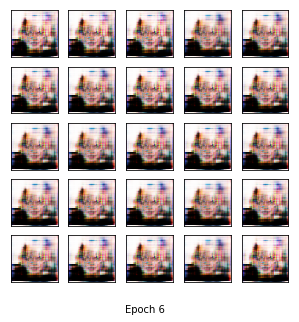

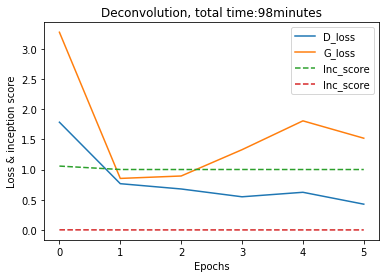

In [233]:
filename='GANnearest_t9000_h100_train3_ep6' #'GANnearest_t4000_h100_ep30.c1' #'GANnearest_t10000_h100_train2_ep3' #GANnearest_t4000_h100_ep30.c1
hidden_dim = 100

G,D,train_hist = GAN_CelebA.loadCheckpoint_Upsampling(filename,hidden_dim,use_cuda=use_cuda,mode='nearest')
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/result_Nearest.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss & inception score')
plt.title('Deconvolution, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.show()

nearest,x=4000,h=100,epoch=30,critic=1

[27/30], loss_D: 0.332, loss_G: 2.480 - critic: 1, ptime: 73.47s
Inception score:  (1.0210612, 0.00051067217)
[28/30], loss_D: 0.398, loss_G: 2.264 - critic: 1, ptime: 73.66s
Inception score:  (1.0192149, 0.00080248615)
[29/30], loss_D: 0.445, loss_G: 2.281 - critic: 1, ptime: 73.37s
Inception score:  (1.0144033, 0.0005569102)
[30/30], loss_D: 0.378, loss_G: 2.420 - critic: 1, ptime: 73.70s
Inception score:  (1.008785, 0.00036858587)
Avg per epoch ptime: 73.68s, total 30 epochs ptime: 3086.92s

### Bilinear Upsampling followed by regular convolution

==> Resuming from checkpoint..


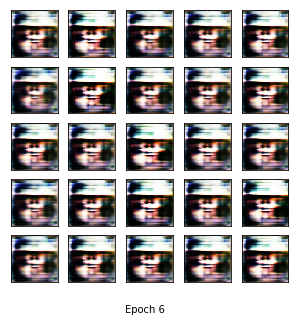

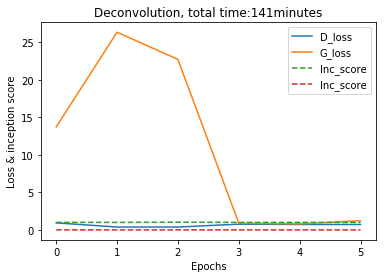

In [236]:
filename = 'GANBilinear_t9000_h100_train3_ep6'#'GANBilinear_t4000_h100_ep30.c4'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint_Upsampling(filename,hidden_dim,use_cuda=use_cuda,mode='nearest')
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/result_Nearest.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss & inception score')
plt.title('Deconvolution, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.show()

Bilinear,x=4000, h=100, epoch=30, critic=4

[1/30], loss_D: 0.365, loss_G: 9.429 - critic: 4, ptime: 304.32s
Inception score:  (1.001323, 8.685289e-05)
[2/30], loss_D: 26.208, loss_G: 1.112 - critic: 4, ptime: 302.58s
Inception score:  (1.0, 0.0)
[3/30], loss_D: 27.631, loss_G: 0.000 - critic: 4, ptime: 303.34s
Inception score:  (1.0, 0.0)
[4/30], loss_D: 27.631, loss_G: 0.000 - critic: 4, ptime: 302.74s
...
[29/30], loss_D: 27.631, loss_G: 0.000 - critic: 4, ptime: 302.42s
Inception score:  (1.0, 0.0)
[30/30], loss_D: 27.631, loss_G: 0.000 - critic: 4, ptime: 302.41s
Inception score:  (1.0, 0.0)
Avg per epoch ptime: 302.78s, total 30 epochs ptime: 10506.59s

## Wasserstein GAN (question4-5)

==> Resuming from checkpoint..


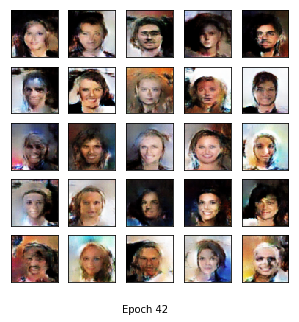

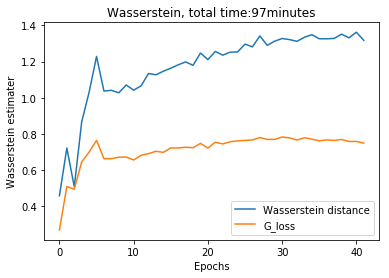

In [296]:
filename = 'GAN_W_fixlr_t10000_h100_trainw_ep42' #'GAN_W_t1000_h100_trainw_ep9'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint_W(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/result_Nearest.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='Wasserstein distance')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
#plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Wasserstein estimater')
plt.title('Wasserstein, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.show()

GAN_W_t10000_h100_trainw_ep24

[1/30], loss_D -0.458, loss_G 0.270 - critic 1:1, ptime 149.24s
[2/30], loss_D -0.738, loss_G 0.515 - critic 1:1, ptime 147.13s
[3/30], loss_D -0.515, loss_G 0.501 - critic 1:1, ptime 147.20s
...
[22/30], loss_D -1.593, loss_G 0.818 - critic 1:1, ptime 147.26s
[23/30], loss_D -1.601, loss_G 0.824 - critic 1:1, ptime 147.20s

## Qualitative Evaluations 
### question5b
### Increase the dimension of the latent space (for z) to 200 
DCGAN and WGAN

==> Resuming from checkpoint..


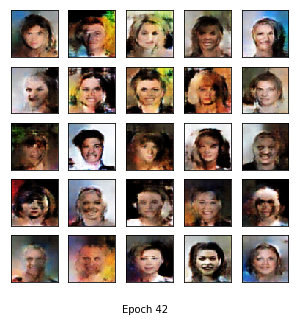

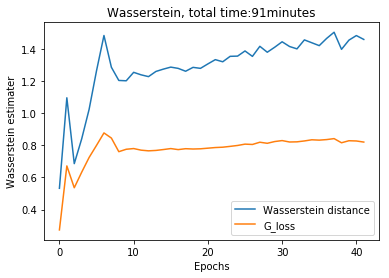

In [312]:
filename='GAN_W_fixlr_t10000_h200_trainw_ep42' #'GANDeconvolution_t2000_h100_ep20.c5'
hidden_dim=200
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/result_Deconvolution.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='Wasserstein distance')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
#plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Wasserstein estimater')
plt.title('Wasserstein, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.show()

#test_z = torch.randn(10000,100,1,1)
#inception_score(test_z, G, D, batch_size=128, cuda=use_cuda, resize=False, splits=10)


In [292]:
# filename = 'GAN_W_t10000_h200_trainw_ep48' #'GAN_W_t1000_h100_trainw_ep9'
# hidden_dim=200
# G,D,train_hist = GAN_CelebA.loadCheckpoint_W(filename,hidden_dim,use_cuda=use_cuda)
# epoch_num=len(train_hist['D_losses'])
# GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/result_Nearest.pdf', use_cuda=use_cuda)

# plt.plot(range(0,epoch_num),train_hist['D_losses'],label='Wasserstein distance')
# plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
# #plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
# plt.xlabel('Epochs')
# plt.ylabel('Wasserstein estimater')
# plt.title('Wasserstein, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
# plt.legend()
# plt.show()

## question 5(c)
### Pick two random points z 0 and z 1 in the latent space,compute $z0 = αz0 + (1 − α)z1$

/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4
==> Resuming from checkpoint..


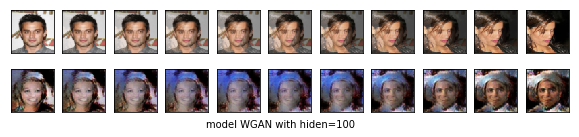

==> Resuming from checkpoint..


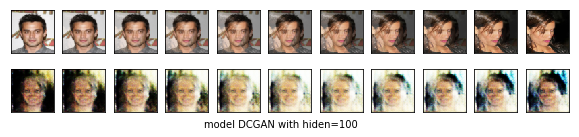

In [308]:
importlib.reload(GAN_CelebA)

filename = 'GAN_W_fixlr_t10000_h100_trainw_ep42' #'GAN_W_t1000_h100_trainw_ep9'
hidden_dim = 100
x_0 = dataset[3][0]
x_1 = dataset[6][0]

G,D,train_hist = GAN_CelebA.loadCheckpoint_W(filename,hidden_dim,use_cuda=use_cuda)
GAN_CelebA.compareRandomPoint(x_0,x_1,G,3, hidden_dim, show = True, save = False, \
            path = 'result.png',use_cuda=use_cuda,label='model WGAN with hiden='+str(hidden_dim))

filename='GANDeconv_t10000_h100_train2_ep15'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
GAN_CelebA.compareRandomPoint(x_0,x_1,G,4, hidden_dim, show = True, save = False, \
            path = 'result.png',use_cuda=use_cuda,label='model DCGAN with hiden='+str(hidden_dim))


## Quantitative Evaluations (GAN) (question 6)

### Compare 3 method for increase/double the feature map size:

image size :  torch.Size([3, 64, 64])


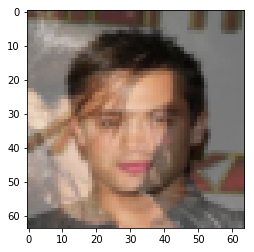

In [200]:
x = dataset[3][0]
print ("image size : ", x.size())
# plt.imshow((x.numpy().transpose(1, 2, 0)*0.5 +0.5))

x_0 = dataset[3][0]
x_1 = dataset[6][0]
x_prime=torch.zeros(11,3,64,64)
for n in range(0,11):
    x_prime[n]=n*0.1*x_0+(1-n*0.1)*x_1
    
plt.imshow((x_prime[5].numpy().transpose(1, 2, 0)*0.5 +0.5))

Deconvolution : torch.Size([3, 128, 128])


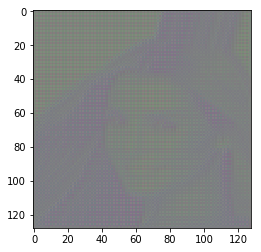

In [23]:
x = dataset[0][0]
x = Variable(x.view(1,3,64,64))
deconv = nn.ConvTranspose2d(3, 3, 4, 2, 1)
deconv.weight.data.normal_(mean=0.0, std=0.02)
deconv.bias.data.zero_()
deconv_x = deconv(x).squeeze(0)
print ('Deconvolution :' , deconv_x.size())
plt.imshow((deconv_x.data.numpy().transpose(1, 2, 0) + 1) / 2)

image size :  torch.Size([3, 64, 64])
deconv_x size :  torch.Size([3, 64, 64])
nearest_x size :  torch.Size([3, 64, 64])
bilinear_x size :  torch.Size([3, 64, 64])


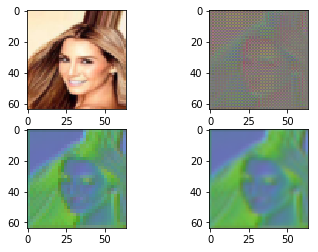

In [28]:

x = dataset[0][0]

print ("image size : ", x.size())
plt.subplot(2,2,1)
plt.imshow((x.numpy().transpose(1, 2, 0) + 1) / 2)

x = Variable(x.view(1,3,64,64))
conv = nn.Conv2d(3,10,4,2,1)
conv_x = conv(x) # (batch,10,32,32)

# Deconvolution (transposed convolution) with paddings and strides.
deconv = nn.ConvTranspose2d(10,3,4,2,1)
#deconv.weight.data.normal_(mean=0.0, std=0.05)
#deconv.bias.data.zero_()

deconv_x = deconv(conv_x).squeeze(0)
print ("deconv_x size : ", deconv_x.size())
plt.subplot(2,2,2)
plt.imshow((deconv_x.data.numpy().transpose(1, 2, 0) + 1) / 2)

# Nearest-Neighbor Upsampling followed by regular convolution.
plt.subplot(2,2,3)
upsampling_nearest = nn.Upsample(scale_factor=2,mode='nearest')
conv2 = nn.Conv2d(10, 3, 1, 1, 0)
upsampling_nearest_x = conv2(upsampling_nearest(conv_x)).squeeze(0)
print ("nearest_x size : ", upsampling_nearest_x.size())
plt.imshow((upsampling_nearest_x.data.numpy().transpose(1, 2, 0) + 1) / 2)

# Bilinear Upsampling followed by regular convolution
plt.subplot(2,2,4)
upsampling_bilinear = nn.Upsample(scale_factor=2,mode='bilinear')
upsampling_bilinear_x = conv2(upsampling_bilinear(conv_x)).squeeze(0)
print ("bilinear_x size : ", upsampling_bilinear_x.size())
plt.imshow((upsampling_bilinear_x.data.numpy().transpose(1, 2, 0) + 1) / 2)
# plt.savefig('/Users/fanxiao/Google Drive/UdeM/IFT6135 Representation Learning/homework4/figures/faces.pdf')
plt.savefig('faces.pdf')